In [33]:
from gensim.models.wrappers import FastText
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
from gensim.models.phrases import Phraser

In [14]:
from util_kw import *

In [15]:
matplotlib.rcParams['figure.figsize'] = (17, 12)

In [27]:
wvm_ft = FastText.load_fasttext_format('indianexpress_opinion.bin')
wvm_wv = Word2Vec.load('./word2vec_models/IN-indianexpress-opinion_with_phraser')

In [17]:
wordlist = lower_caste_keywords

In [18]:
wordlist

['dalit',
 'untouchable',
 'sc_st',
 'obc',
 'lower_caste',
 'minorities',
 'backward_class']

In [28]:
g1 = nx.Graph()
for word in wordlist:
    recurse_add_(word, wvm_ft, g1, depth=1, topn=3)

g2 = nx.Graph()
for word in wordlist:
    recurse_add_(word, wvm_wv, g2, depth=1, topn=3)


In [29]:
len(g1.nodes()), len(g2.nodes())

(28, 28)

/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes

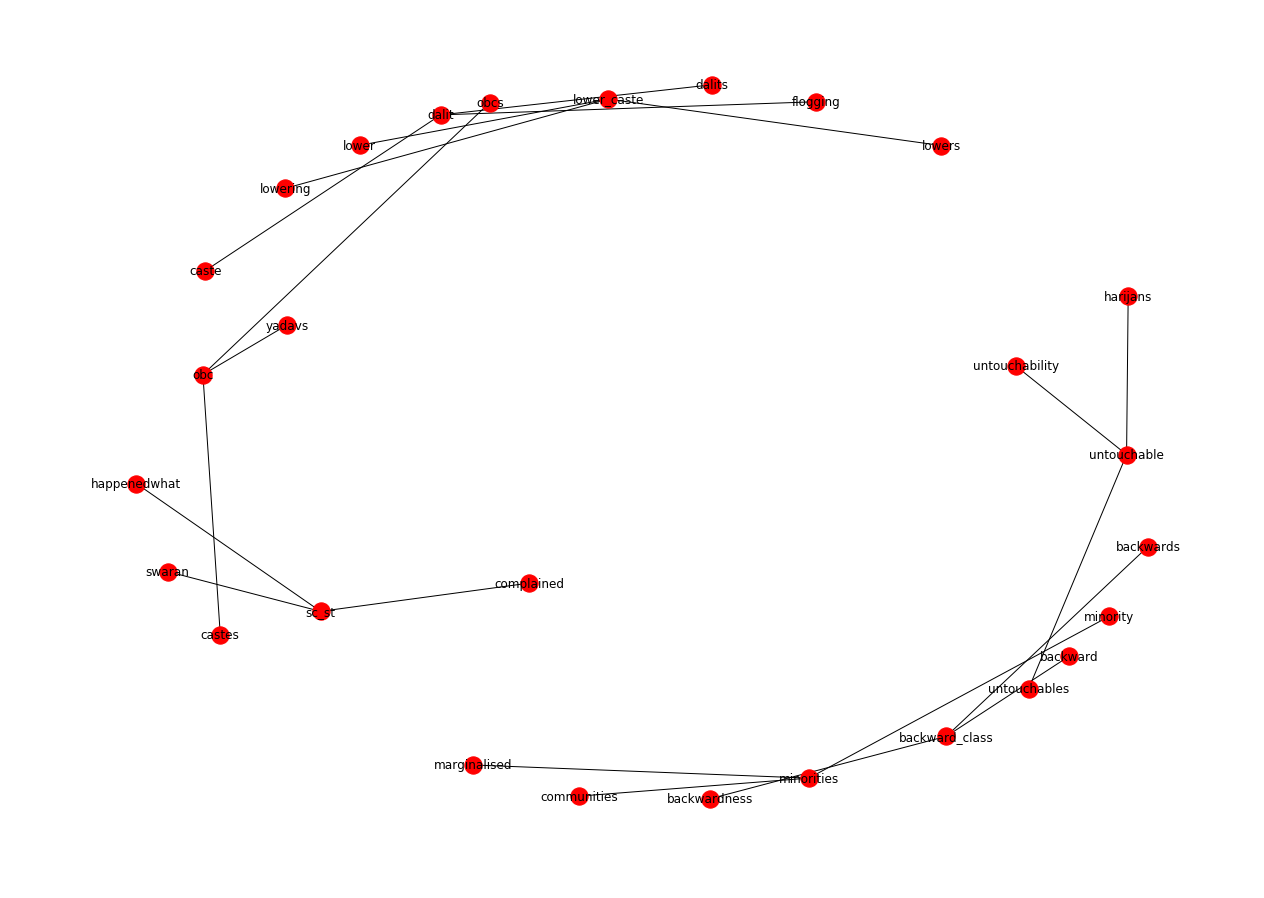

In [30]:
nx.draw(g1, with_labels=True)
plt.show()

/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/sigmaroles/miniconda3/envs/py36nlp/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes

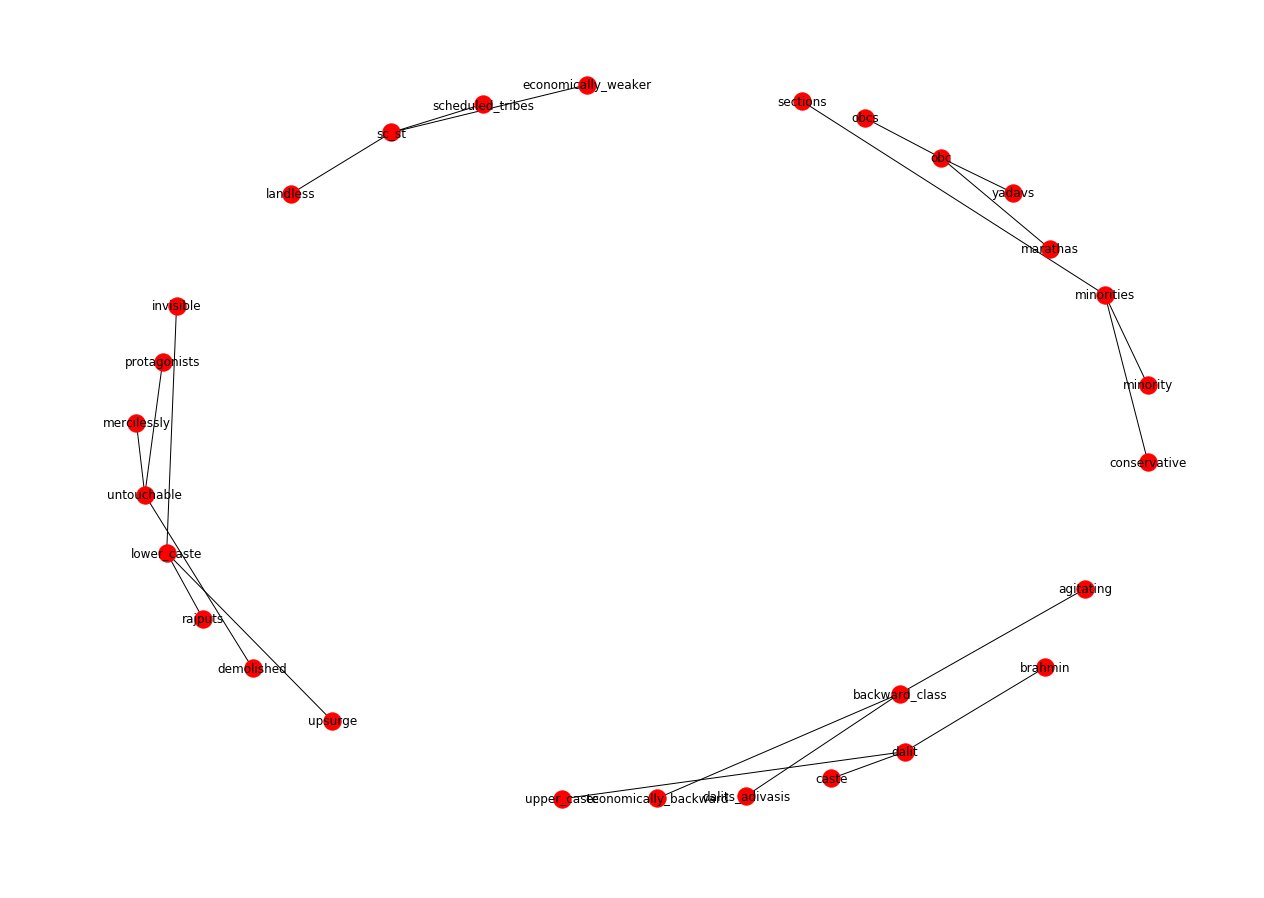

In [31]:
nx.draw(g2, with_labels=True)
plt.show()

In [32]:
[x for x in zip(sorted(g1.nodes()), sorted(g2.nodes()))]

[('backward', 'agitating'),
 ('backward_class', 'backward_class'),
 ('backwardness', 'brahmin'),
 ('backwards', 'caste'),
 ('caste', 'conservative'),
 ('castes', 'dalit'),
 ('communities', 'dalits_adivasis'),
 ('complained', 'demolished'),
 ('dalit', 'economically_backward'),
 ('dalits', 'economically_weaker'),
 ('flogging', 'invisible'),
 ('happenedwhat', 'landless'),
 ('harijans', 'lower_caste'),
 ('lower', 'marathas'),
 ('lower_caste', 'mercilessly'),
 ('lowering', 'minorities'),
 ('lowers', 'minority'),
 ('marginalised', 'obc'),
 ('minorities', 'obcs'),
 ('minority', 'protagonists'),
 ('obc', 'rajputs'),
 ('obcs', 'sc_st'),
 ('sc_st', 'scheduled_tribes'),
 ('swaran', 'sections'),
 ('untouchability', 'untouchable'),
 ('untouchable', 'upper_caste'),
 ('untouchables', 'upsurge'),
 ('yadavs', 'yadavs')]

In [22]:
with open('g2', 'wb') as fh:
    pickle.dump(g2, fh)

In [34]:
path_phraser_models = '/home/sigmaroles/NLPproj/JMCasteCopy/ft/phraser_models/'
bgmodel = Phraser.load(path_phraser_models+'IN-indianexpress-opinion_00_bigramphraser')

In [38]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [39]:
%%cython
with open('IN-indianexpress-opinion_ALL.txt', 'r') as fh:
    alltext = fh.read()
    cdef text = []
    for cdef line in alltext:
        text = text + bgmodel[line.split()]


Error compiling Cython file:
------------------------------------------------------------
...
with open('IN-indianexpress-opinion_ALL.txt', 'r') as fh:
    alltext = fh.read()
    cdef text = []
        ^
------------------------------------------------------------

/home/sigmaroles/.cache/ipython/cython/_cython_magic_b84a41a1791ad949d1fe27713100d275.pyx:3:9: cdef statement not allowed here


TypeError: object of type 'NoneType' has no len()